In [14]:
from pydataset import data
from plotnine import *
import pandas as pd

diamonds = data('diamonds')
diamonds.to_csv("diamonds.csv",index= False)
def color_to_num(x):
    d = {"D":0,"E":1,"F":2,"G":3,"H":4,"I":5,"J":6}
    return d[x] 
diamonds["color"]= diamonds["color"].apply(color_to_num)

In [61]:
print(len(diamonds))
print(diamonds.describe())
print(diamonds.columns)

53940
              carat         color         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      2.594197     61.749405     57.457184   3932.799722   
std        0.474011      1.701105      1.432621      2.234491   3989.439738   
min        0.200000      0.000000     43.000000     43.000000    326.000000   
25%        0.400000      1.000000     61.000000     56.000000    950.000000   
50%        0.700000      3.000000     61.800000     57.000000   2401.000000   
75%        1.040000      4.000000     62.500000     59.000000   5324.250000   
max        5.010000      6.000000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.72000

In [62]:
print(diamonds.isnull().sum())
print(diamonds.duplicated().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
146


Those duplicates are suspicious ... 

In [65]:
duplicates = diamonds[diamonds.duplicated()].drop_duplicates()
print(duplicates)

       carat        cut  color clarity  depth  table  price     x     y     z
1006    0.79      Ideal      3     SI1   62.3   57.0   2898  5.90  5.85  3.66
2026    1.52       Good      1      I1   57.3   58.0   3105  7.53  7.42  4.28
2184    1.00       Fair      1     SI2   67.0   53.0   3136  6.19  6.13  4.13
2821    1.00       Fair      2     SI2   65.1   55.0   3265  6.26  6.23  4.07
3157    0.90  Very Good      5     VS2   58.4   62.0   3334  6.29  6.35  3.69
3705    1.00      Ideal      1     SI2   62.9   56.0   3450  6.32  6.30  3.97
3982    1.00       Fair      4     SI1   65.5   57.0   3511  6.26  6.21  4.08
4387    0.31       Good      0     SI1   63.5   56.0    571  4.29  4.31  2.73
4494    1.00      Ideal      5     SI2   58.8   55.0   3629  6.53  6.46  3.82
4521    1.00    Premium      3     SI1   60.1   61.0   3634  6.44  6.40  3.86
5176    1.04    Premium      5     SI2   62.0   57.0   3774  6.53  6.47  4.03
5666    1.00    Premium      2     SI1   59.4   62.0   3881  6.5

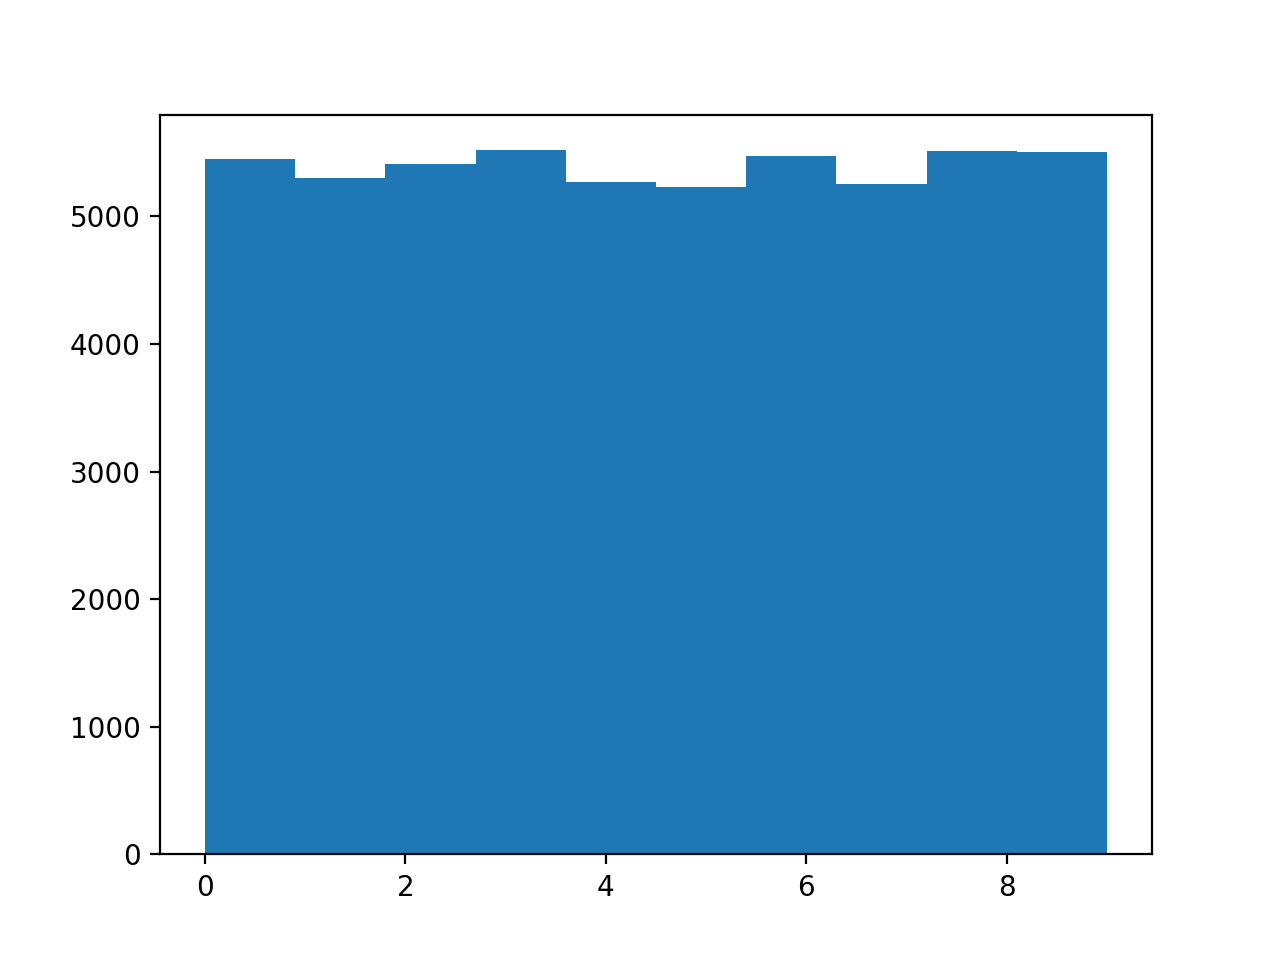

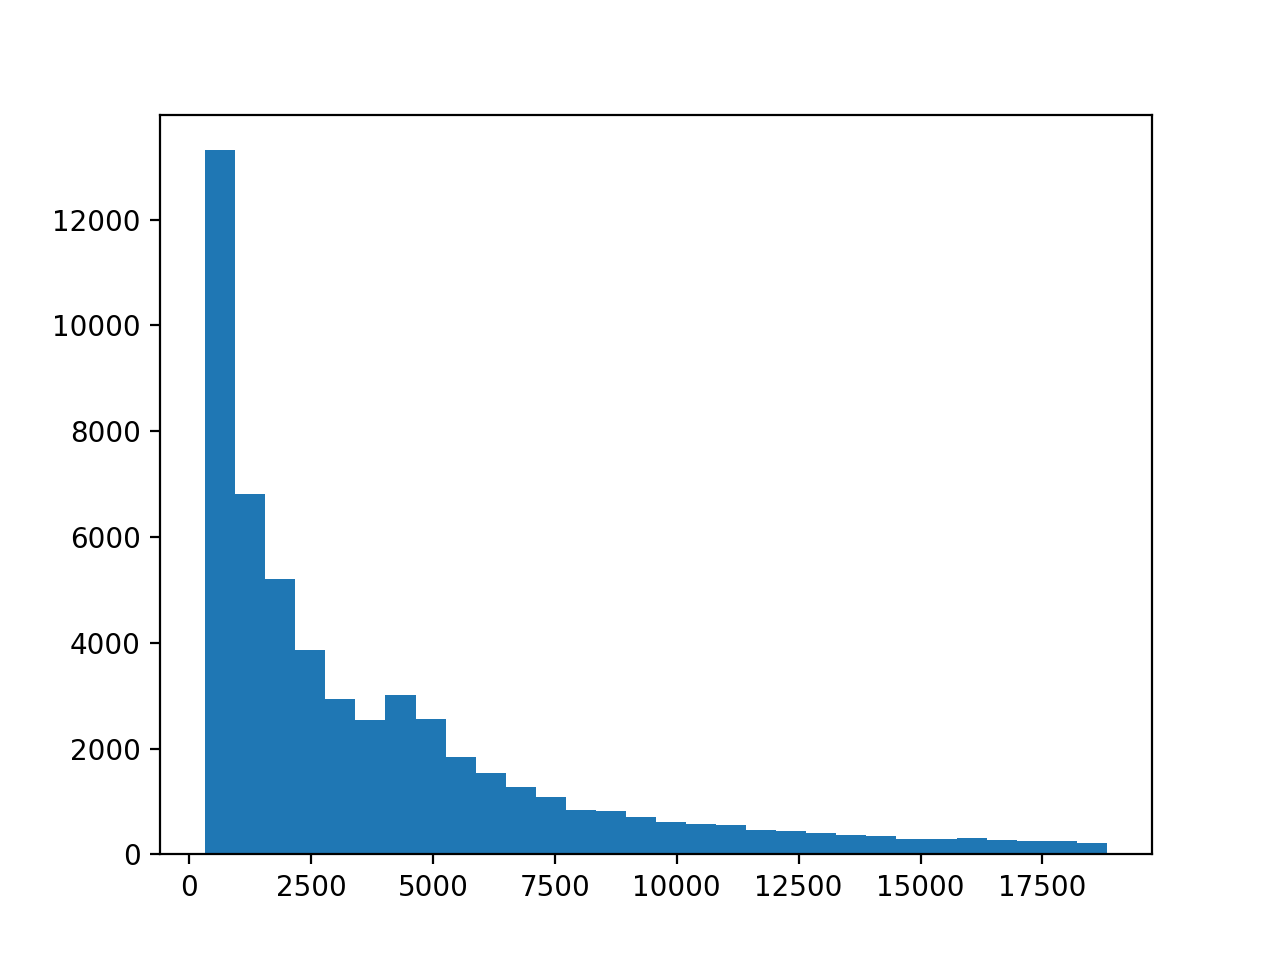

In [81]:
import matplotlib.pyplot as plt
plt.hist(diamonds["depth"]*10 %10)
plt.show()

In [85]:
diamonds.plot(kind = "scatter", x = "carat",y ="price")

plt.show()

<AxesSubplot: xlabel='carat', ylabel='price'>

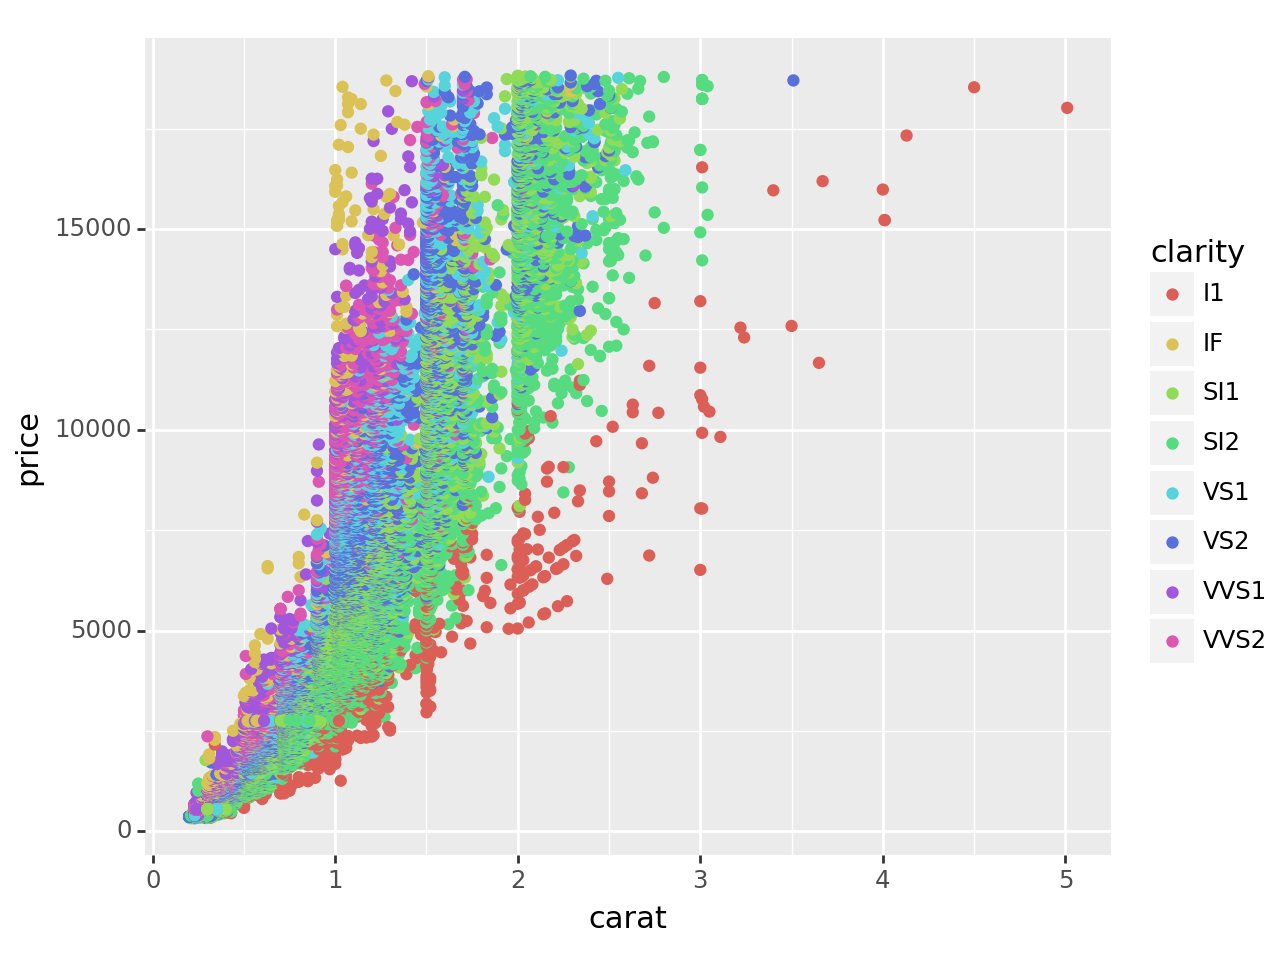

In [15]:
pp = ( 
    ggplot(diamonds)
    + aes(x="carat",y="price",color = "clarity")
    + geom_point()
)
print(pp)

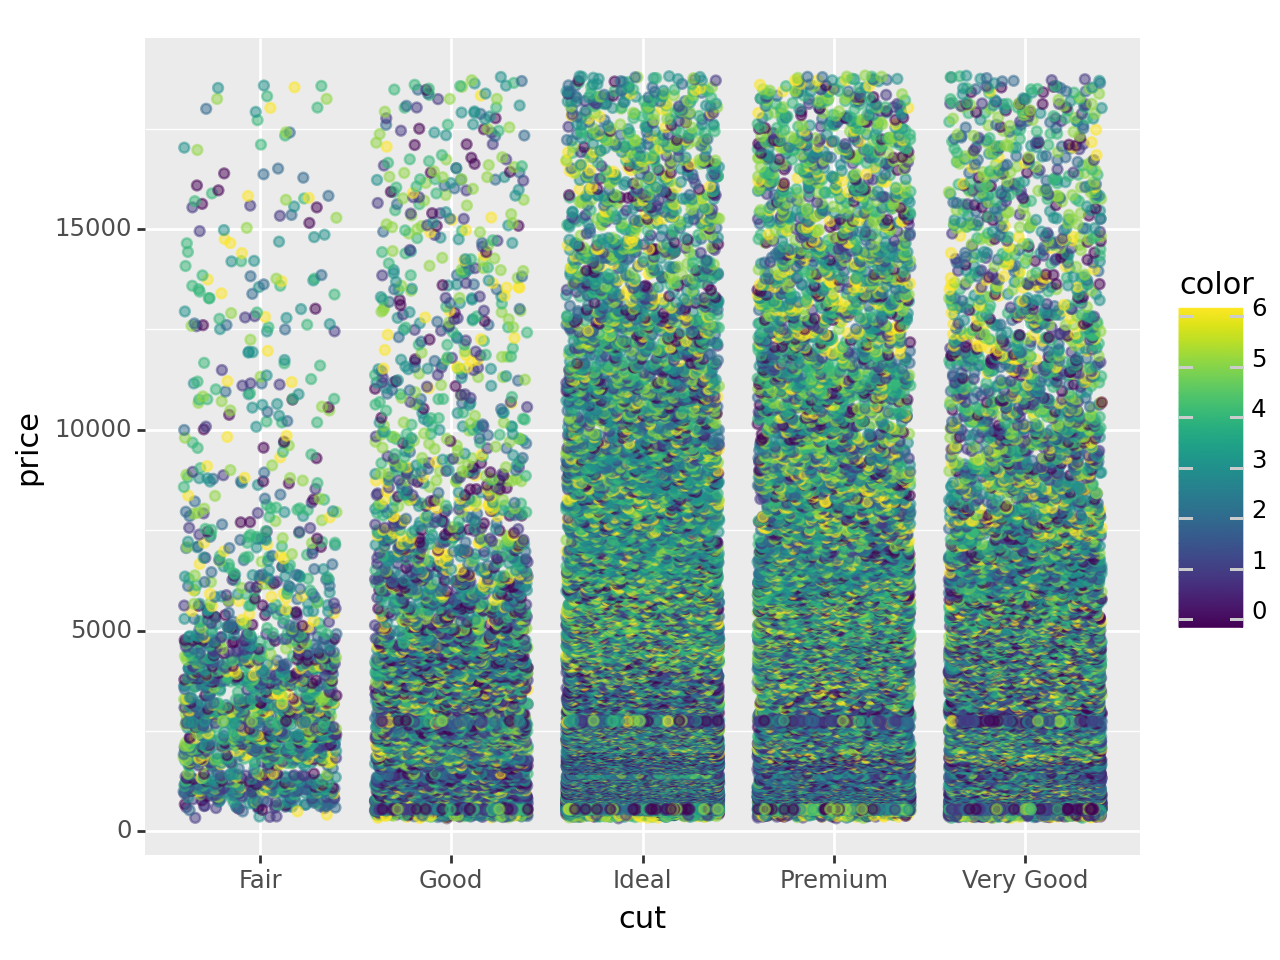

In [17]:
pp = ( 
    ggplot(diamonds)
    + aes(x="cut",y="price",color = "color")
    + geom_jitter(alpha = 0.5)
)
print(pp)

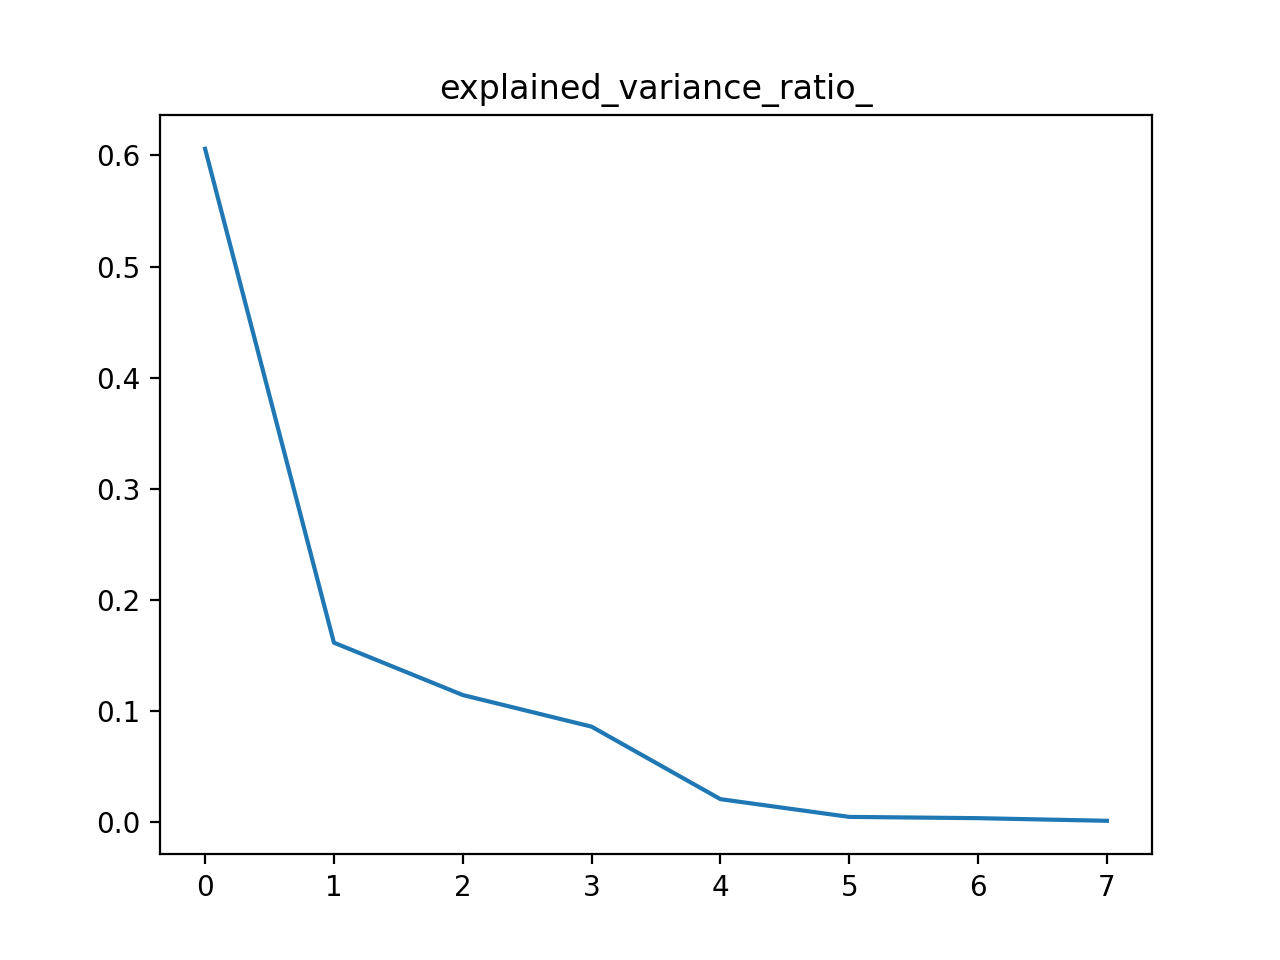

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dia_numeric = diamonds.select_dtypes(include=[float, int])
scaler = StandardScaler()
dia_scaled =  scaler.fit_transform(dia_numeric)

pca = PCA()  # Specify the number of components
pca.fit_transform(dia_scaled)

plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.title("explained_variance_ratio_")
plt.show()

In [50]:
components_df = pd.DataFrame(pca.components_, columns=dia_numeric.columns)
print(components_df[:4])


      carat     color     depth     table     price         x         y  \
0  0.448651  0.146084  0.001027  0.097194  0.418815  0.448751  0.442769   
1 -0.027324 -0.143474 -0.725114  0.667894 -0.015770  0.012453  0.011339   
2  0.035502 -0.971159  0.062295 -0.130468  0.161703  0.048529  0.051612   
3 -0.004154 -0.071142  0.676369  0.723342 -0.091532 -0.036945 -0.051411   

          z  
0  0.441696  
1 -0.079142  
2  0.059331  
3  0.042868  


C:\Users\isido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names


          pc0        pc1        pc2        pc3
0  146.799851 -13.248945  48.948924  51.222666
1  147.230380  -8.001176  48.042246  54.417244
2  148.217604  -3.238485  47.521766  55.239791
3  151.365351 -12.609437  46.061606  52.970838
4  152.109108 -13.428222  45.329033  53.410616


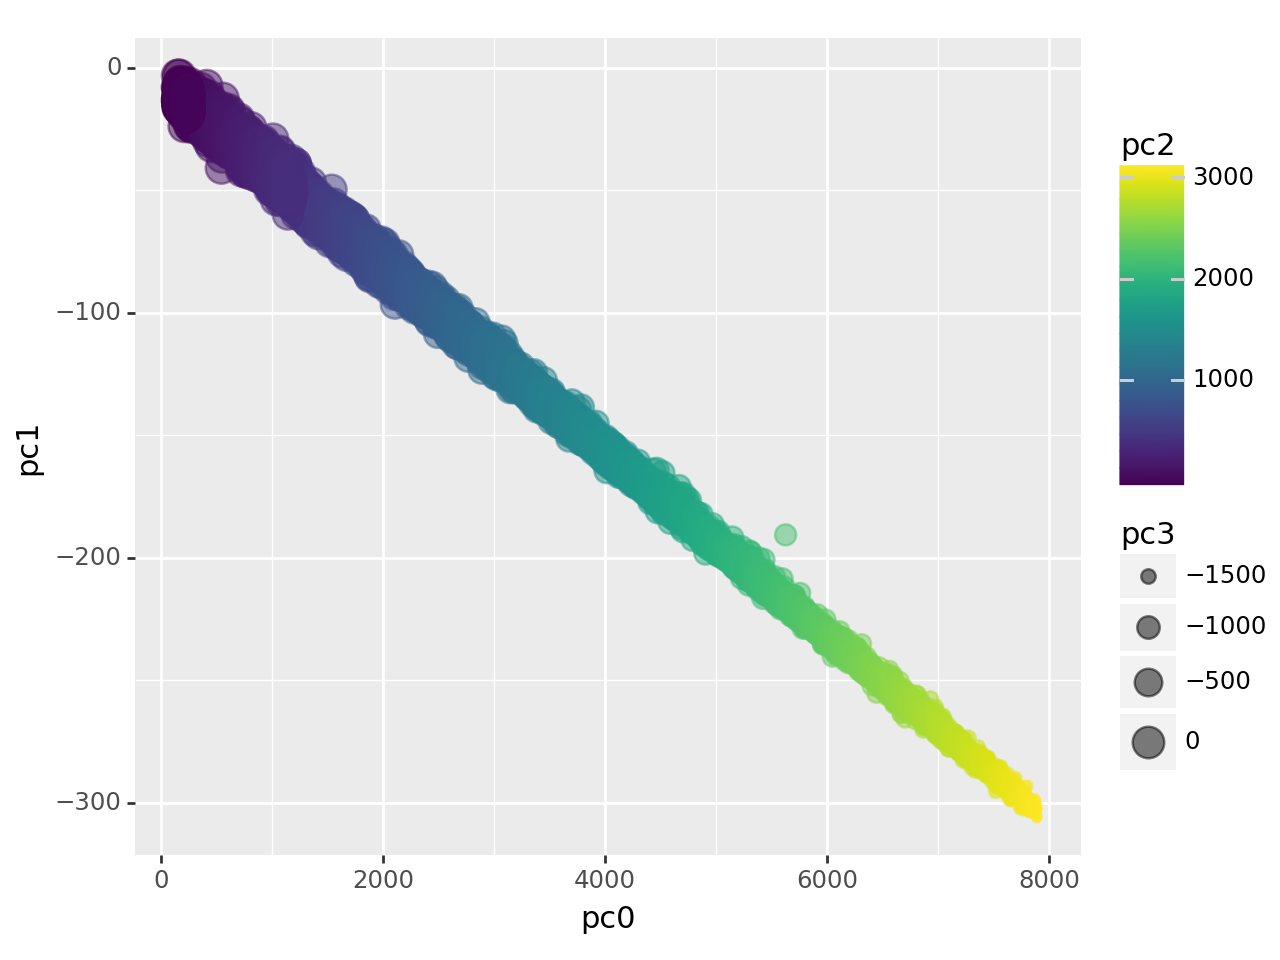

In [57]:
pca_dia = pca.transform(dia_numeric)
pca_df = pd.DataFrame(pca_dia[:,:4], columns= [f"pc{i}" for i in range(4)])

print(pca_df.head())
pp = ( 
    ggplot(pca_df)
    + aes(x="pc0",y="pc1",color="pc2",size="pc3")
    + geom_point(alpha =0.5)
)
print(pp)

In [58]:
from sklearn.model_selection import train_test_split
X= diamonds.drop("price",axis=1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




43152
10788
